#### Objectives in the analysis

- What variables are contributing to customer churn?
- Identifying customers who are more likely to churn?
- What actions can be taken to stop them from leaving?

### Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from imblearn.combine import SMOTEENN


from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.metrics import f1_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow import keras

import shap

### Reading Data

In [5]:
raw_data = pd.read_csv('customer_churn_dataset.csv')
df = raw_data.copy()
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

### Interpreting the Dataset

In [6]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [7]:
df.columns.array

<NumpyExtensionArray>
[      'customerID',           'gender',    'SeniorCitizen',
          'Partner',       'Dependents',           'tenure',
     'PhoneService',    'MultipleLines',  'InternetService',
   'OnlineSecurity',     'OnlineBackup', 'DeviceProtection',
      'TechSupport',      'StreamingTV',  'StreamingMovies',
         'Contract', 'PaperlessBilling',    'PaymentMethod',
   'MonthlyCharges',     'TotalCharges',            'Churn']
Length: 21, dtype: object

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### Data cleaning

In [11]:
# From Data interpretation part we can notice some things which needs to be taken care of before analyzing data

# 1. Drop 'customerID' column as it is not useful for our analysis
# 2. Change the dtype of 'totalCharges' to numeric
# 3. Before doing the 2nd step we need to deal with blank values in that column
# 4. Change the dtype of 'seniorCitizen' to string

In [12]:
df.drop('customerID',axis=1,inplace=True)

In [13]:
df = df[df['TotalCharges'] != ' ']

In [14]:
df.shape

(7032, 20)

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [17]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [18]:
df.describe(include='O')

gender SeniorCitizen Partner Dependents PhoneService MultipleLines  \
count    7032          7032    7032       7032         7032          7032   
unique      2             2       2          2            2             3   
top      Male            No      No         No          Yes            No   
freq     3549          5890    3639       4933         6352          3385   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7032           7032         7032             7032   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3497         3087             3094   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7032        7032            7032            7032   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3472        2809            2781            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7032              7032  7032  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4168              2365  5163

In [19]:
df['TotalCharges'].dtype

dtype('float64')

In [20]:
df['SeniorCitizen'].dtype

dtype('O')

In [21]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
# Exploring dataset to see if there any any inconsistencies and handle them accordingly 

In [23]:
df2 = df.copy()
df2['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df2['Churn'].replace(to_replace='No' ,value=0,inplace=True)
df_dummies = pd.get_dummies(df2)
df_dummies.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0       1           29.85         29.85      0           True        False   
1      34           56.95       1889.50      0          False         True   
2       2           53.85        108.15      1          False         True   
3      45           42.30       1840.75      0          False         True   
4       2           70.70        151.65      1           True        False   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  ...  \
0              True              False       False         True  ...   
1              True              False        True        False  ...   
2              True              False        True        False  ...   
3              True              False        True        False  ...   
4              True              False        True        False  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              False                False                  True   
1              False                 True                 False   
2              False                False                  True   
3              False                 True                 False   
4              False                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 47 columns]

### Correlation plot

In [24]:
df_dummies.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen_Yes                          0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

<Axes: >

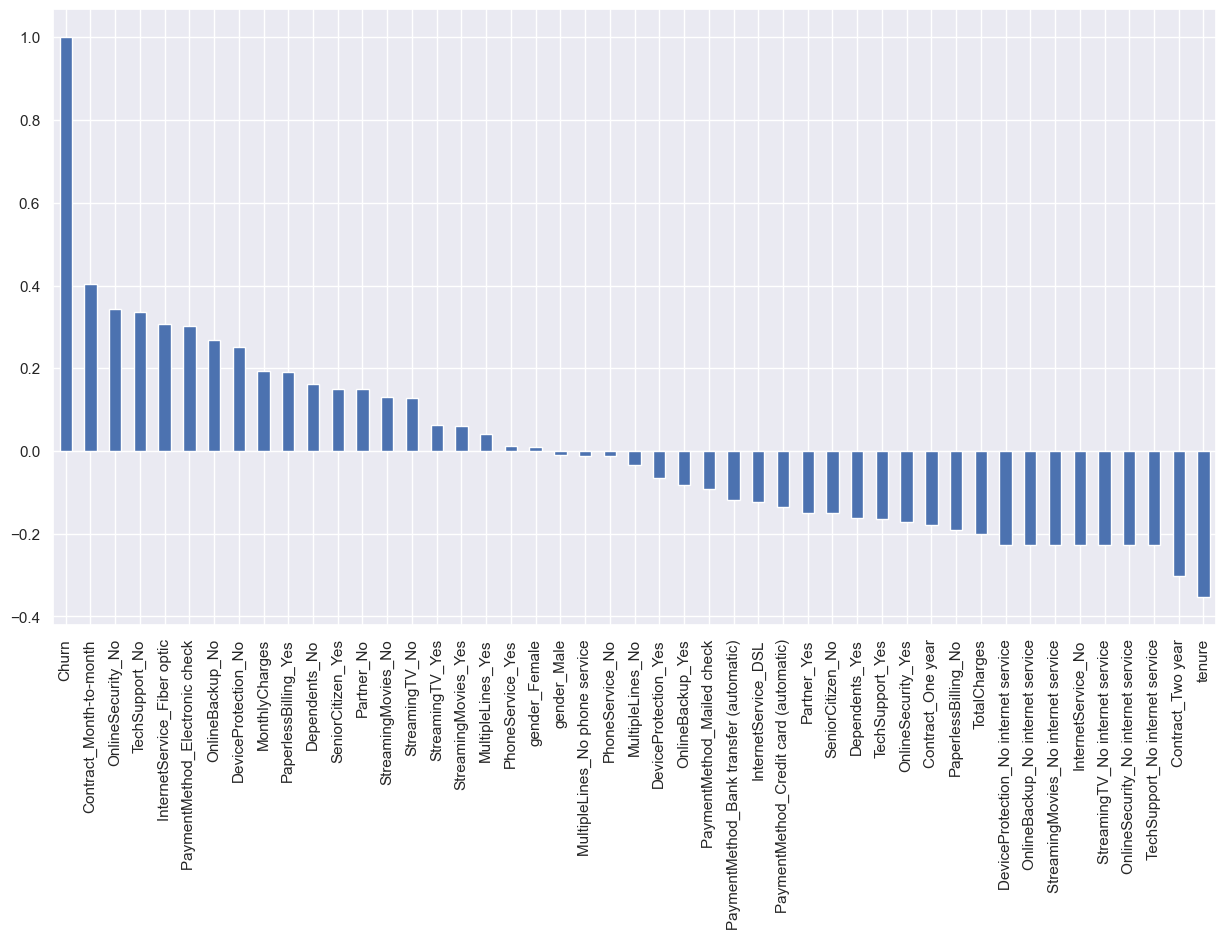

In [25]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

### Data visualization

In [26]:
df

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes      24          Yes   
7039  Female            No     Yes        Yes      72          Yes   
7040  Female            No     Yes        Yes      11           No   
7041    Male           Yes     Yes         No       4          Yes   
7042    Male            No      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

#### 1. What is the percentage of customers who are with active services and customers who churn?
- `26.6%` customers have switched to another firm
- `49.5%` are female and `50.5%` are male customers

In [27]:
gender_labels = ['Male','Female']
churn_labels  = ['No','Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=gender_labels, 
                     values=df['gender'].value_counts(), 
                     name='Gender'),
              1,1)

fig.add_trace(go.Pie(labels=churn_labels, 
                     values=df['Churn'].value_counts(), 
                     name='Churn'),
              1,2)

fig.update_traces(hole=.55, hoverinfo='label+percent+name', textfont_size=16)

fig.update_layout(title_text = 'Gender and Churn Distributions',
                  annotations = [dict(text='Gender', x=0.16, y=0.5, font_size=18, showarrow=False),
                                 dict(text='Churn', x=0.83, y=0.5, font_size=18, showarrow=False)])

fig.data[0].marker.colors = ('#003366','#F67280')
fig.data[1].marker.colors = ('#588b8b','#f4f1de')

fig.show()

#### 2. Does gender play a role in customers churn?
- Churn rates are similar for both male and female customers

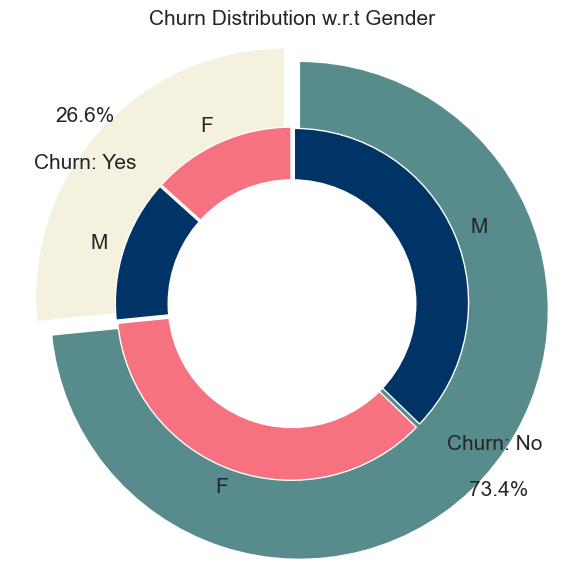

In [28]:
plt.figure(figsize=(6,6))
labels = ['Churn: Yes', 'Churn: No']
values = [df[df['Churn'] =='Yes'].shape[0], df[df['Churn'] =='No'].shape[0]]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#f4f1de', '#588b8b']
colors_gender = ['#F67280','#003366', '#F67280','#003366']
explode = (0.4,0.4)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender', fontsize=15)

plt.axis('equal')
plt.tight_layout()
plt.show()

#### 3. Does the type of service provided leads to more/less customers churn?
Churn is highly concentrated among customers with `Month-to-Month` contracts
- A significantly larger number of customers with Month-to-Month contracts churn compared to those with One-Year or Two-Year contracts
- Customers with Two-Year contracts exhibit the lowest churn

In [29]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [30]:
color_map = {'Month-to-month': '#003366', 'One year': '#336699', 'Two year': '#A52A2A'}

fig = px.histogram(df, 
                   x='Churn', 
                   color='Contract', 
                   barmode='group', 
                   color_discrete_map=color_map,
                   title='Churn Distribution w.r.t Contract')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

#### Churn distribution w.r.t other variables
- Customers without dependents are more likely to churn
- Customers without partners are more likely to churn
- Absence of online security makes most customers churn

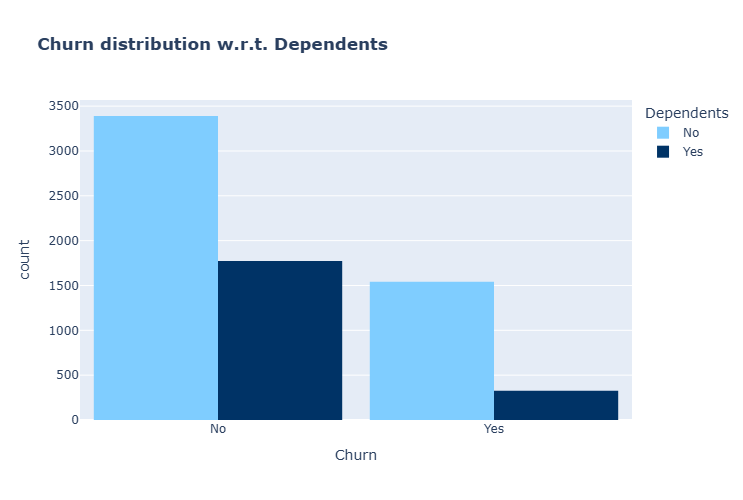

In [31]:
color_map = {"Yes": "#003366", "No": "#7fcdff"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

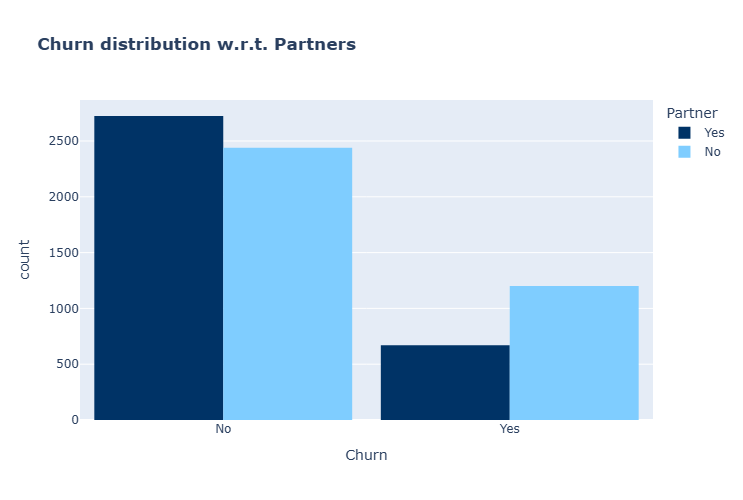

In [32]:
color_map = {"Yes": "#003366", "No": "#7fcdff"}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

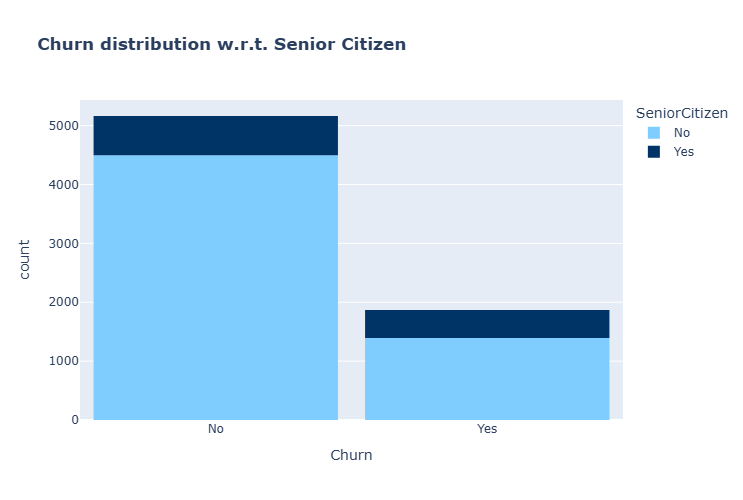

In [33]:
color_map = {"Yes": "#003366", "No": "#7fcdff"}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

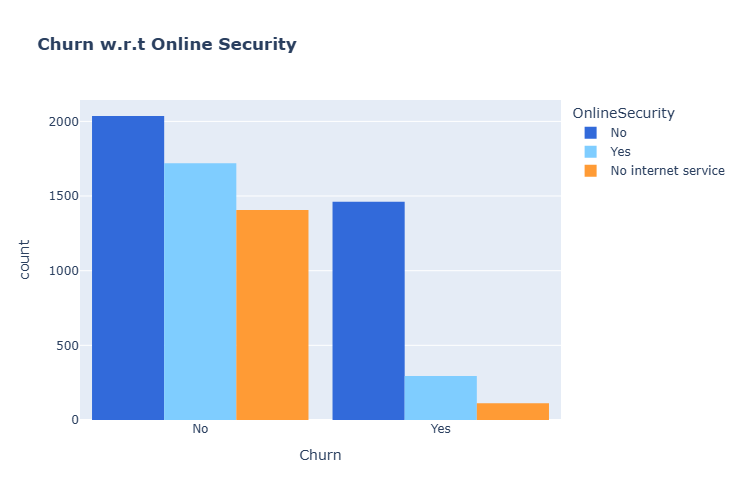

In [34]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Target and Feature variables distribution   

In [35]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

#### 1. Tenure vs Churn
- Customers who leave tend to those who haven't been with the company for very long
- Customers who have stayed with the company for a longer time are much less likely to cancel their service

In [36]:
fig = px.box(df, x='Churn', y = 'tenure')

fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)

fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn Boxplot</b>',)

fig.show()

#### 2. Monthly Charges vs Churn
- High Monthly charges are also one of a reason which makes customers more likely to churn

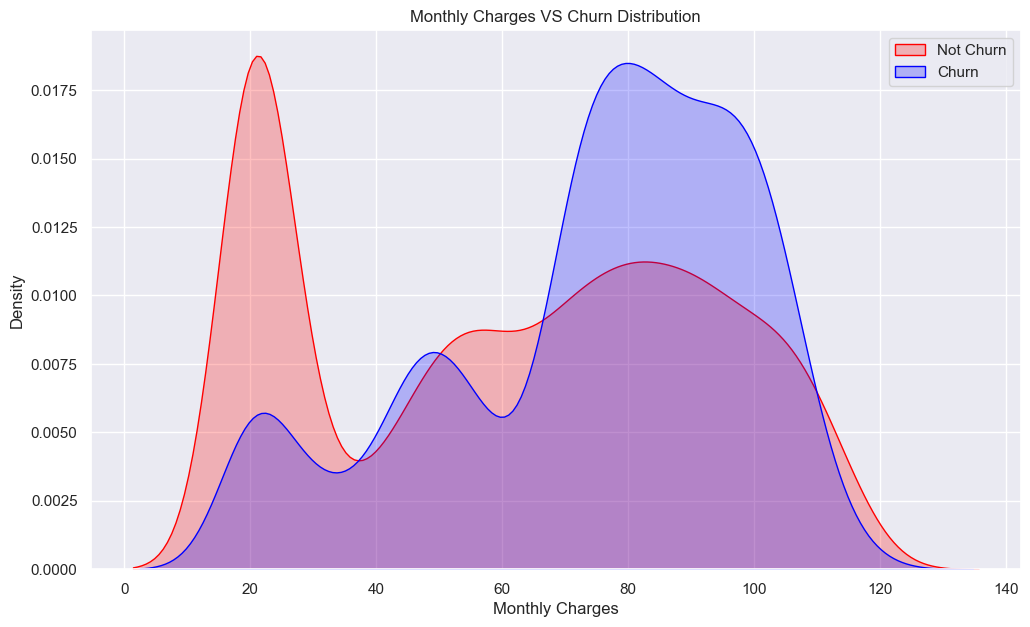

In [37]:
plt.figure(figsize=(12,7))

# sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution')
plt.show()

#### 3. Total Charges vs Churn
- Customers with lower total spending are more likely to churn
- Customers who spend higher total charges are less likely to churn

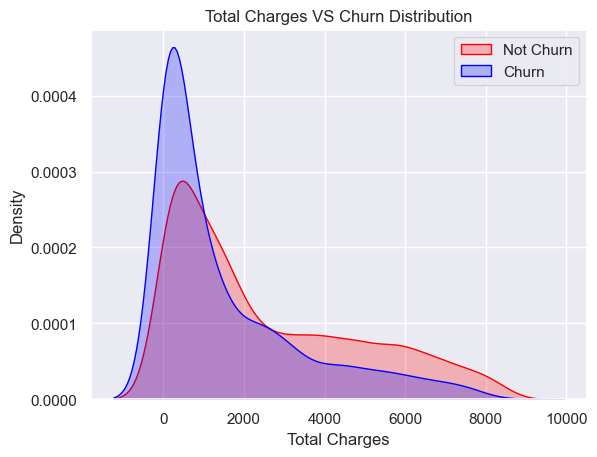

In [38]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Total Charges VS Churn Distribution')
plt.show()

#### 4. Correlation plot

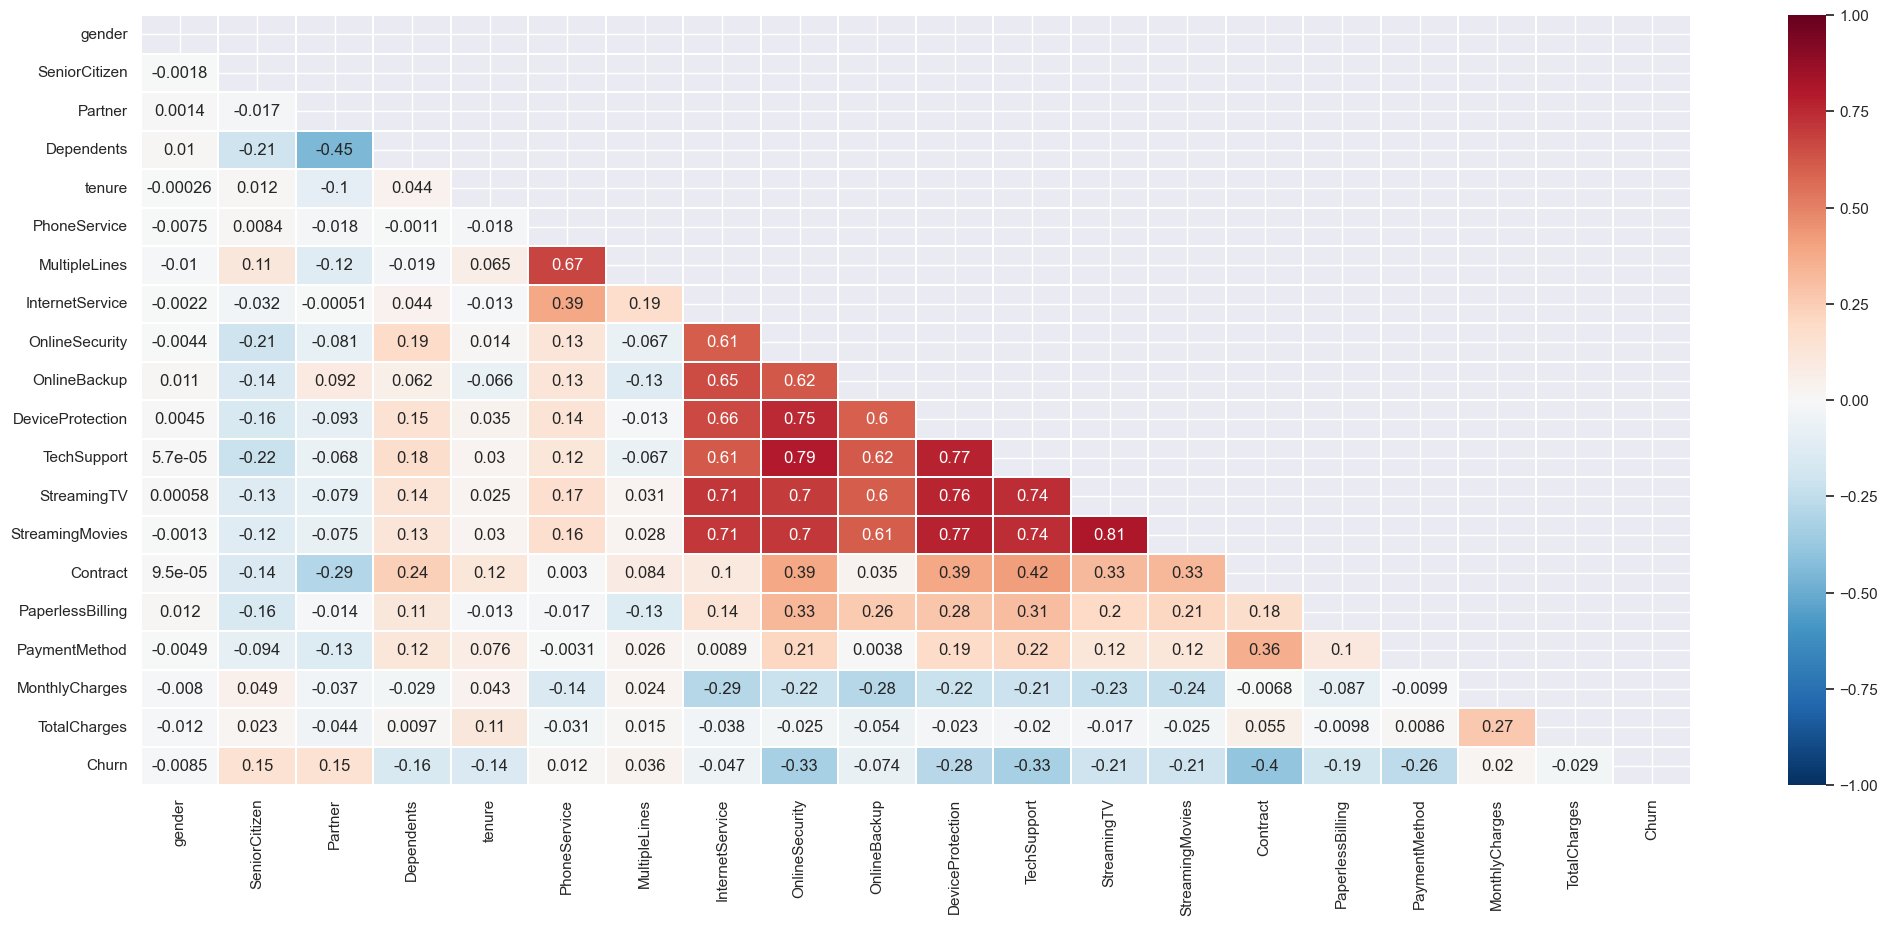

In [39]:
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(25, 10))
ax = sns.heatmap(corr, 
                 mask=mask, 
                 xticklabels=corr.columns, 
                 yticklabels=corr.columns, 
                 annot=True, 
                 linewidths=.2, 
                 cmap='RdBu_r', 
                 vmin=-1, 
                 vmax=1)

#### Distribution of Numerical features

In [40]:
def distplot(feature, dataframe, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(dataframe[feature], color= color)

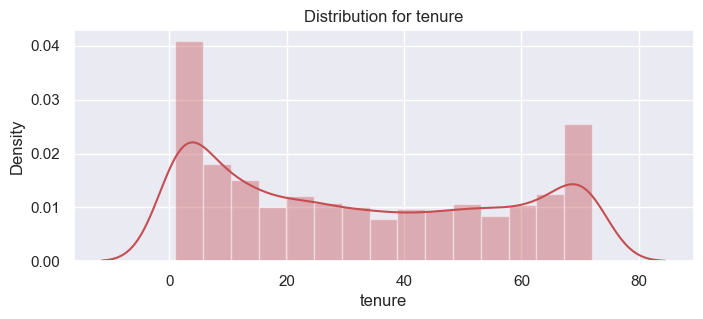

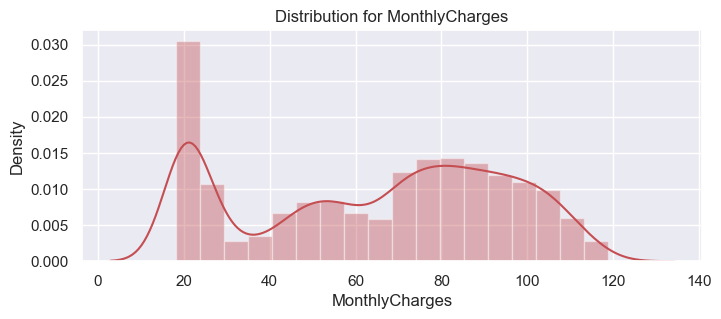

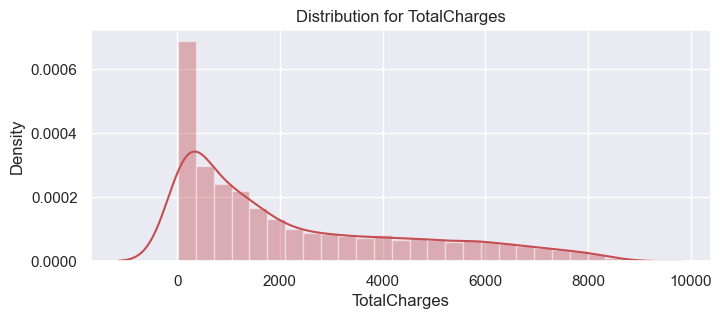

In [41]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feature in num_cols: 
    distplot(feature, df)

In [42]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)

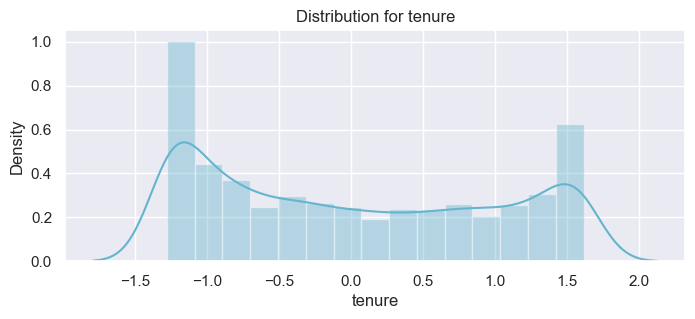

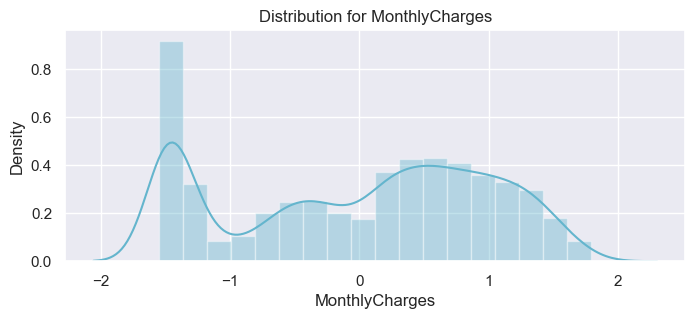

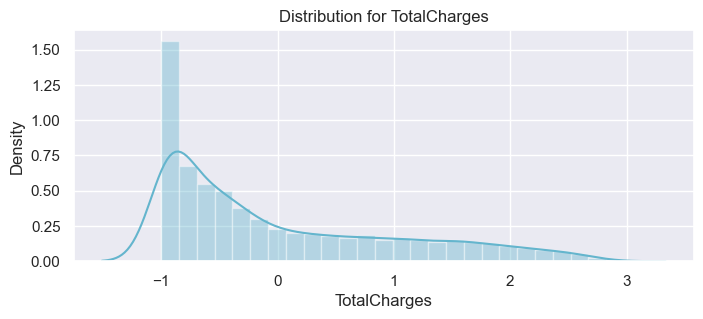

In [43]:
for feat in num_cols: 
    distplot(feat, df_std, color='c')

### Data Preprocessing

In [44]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In preprocessing stage we will do the following tasks
- Label Encoding
- Splitting data into training and testing sets
- Standardizing numerical features (only training data)
- Then performing feature selection using RFECV
- Selecting features from feature selection and  performing one-hot encoding

#### Label Encoding

In [45]:
# Converting objects to int

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [46]:
df2 = df
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

#### Splitting data into training and testing sets

In [47]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [49]:
X_train.shape

(5274, 19)

In [50]:
X_test.shape

(1758, 19)

#### Standarizing training set 

In [51]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [52]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3687       1              0        1           1 -0.550434             1   
5553       1              0        0           0 -1.283779             1   
6870       1              0        0           0  0.671808             1   
1874       0              0        1           0  0.427360             1   
147        1              0        0           0 -1.283779             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3687              0                1               0             2   
5553              0                0               0             0   
6870              2                1               0             0   
1874              2                0               2             2   
147               0                0               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
3687                 0            2            2                2         1   
5553                 0            0            0                2         0   
6870                 0            0            0                0         0   
1874                 0            2            2                2         2   
147                  0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
3687                 0              0        1.162877     -0.179659  
5553                 1              3       -0.305269     -0.984606  
6870                 1              0        0.321096      0.624738  
1874                 0              1        0.713817      0.560688  
147                  1              2       -0.638336     -0.989019

In [53]:
X_test.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
945        0              0        0           0 -1.202296             1   
504        1              0        0           1  1.486636             1   
4856       0              0        1           1 -0.061537             1   
4150       1              1        1           0 -1.039330             1   
5884       1              1        1           0  0.549584             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
945               2                1               0             0   
504               2                0               2             2   
4856              2                1               0             2   
4150              0                1               0             0   
5884              1                0               0             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
945                  0            0            0                0         0   
504                  2            2            2                0         2   
4856                 0            0            0                2         0   
4150                 0            0            2                2         0   
5884                 2            2            2                2         1   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
945                  0              0        0.314468     -0.914297  
504                  1              1        0.481830      1.407398  
4856                 1              2        0.869579      0.306396  
4150                 1              2        0.798326     -0.743181  
5884                 1              0       -0.166077      0.227875

#### Feature Selection

In [54]:
estimator = LogisticRegression(solver = 'liblinear',
                               random_state = 42,
                               class_weight = 'balanced')

In [55]:
cv = StratifiedKFold(n_splits = 5,
                     shuffle = True, 
                     random_state = 42)

In [56]:
selector = RFECV(estimator, 
                 step = 1, 
                 cv = cv, 
                 scoring = 'roc_auc', 
                 n_jobs = -1)

In [57]:
selector = selector.fit(X_train, y_train)

In [58]:
print(f'Optimal number of features: {selector.n_features_}')

Optimal number of features: 12


In [59]:
selected_features = X_train.columns[selector.support_]
print(selected_features)

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [60]:
selector.cv_results_['mean_test_score']

array([0.73923267, 0.7939871 , 0.79972604, 0.83071995, 0.83138269,
       0.83401461, 0.83778163, 0.84148901, 0.84266343, 0.84413701,
       0.84506176, 0.84654979, 0.84613299, 0.84601243, 0.8453616 ,
       0.84562948, 0.84569669, 0.84557594, 0.84554092])

In [61]:
X_train = X_train[selected_features].copy()
X_test = X_test[selected_features].copy()

In [62]:
X_train.head()

SeniorCitizen  Dependents    tenure  PhoneService  InternetService  \
3687              0           1 -0.550434             1                1   
5553              0           0 -1.283779             1                0   
6870              0           0  0.671808             1                1   
1874              0           0  0.427360             1                0   
147               0           0 -1.283779             1                0   

      OnlineSecurity  OnlineBackup  TechSupport  Contract  PaperlessBilling  \
3687               0             2            2         1                 0   
5553               0             0            0         0                 1   
6870               0             0            0         0                 1   
1874               2             2            2         2                 0   
147                0             0            0         0                 1   

      MonthlyCharges  TotalCharges  
3687        1.162877     -0.179659  
5553       -0.305269     -0.984606  
6870        0.321096      0.624738  
1874        0.713817      0.560688  
147        -0.638336     -0.989019

In [63]:
X_test.head()

SeniorCitizen  Dependents    tenure  PhoneService  InternetService  \
945               0           0 -1.202296             1                1   
504               0           1  1.486636             1                0   
4856              0           1 -0.061537             1                1   
4150              1           0 -1.039330             1                1   
5884              1           0  0.549584             0                0   

      OnlineSecurity  OnlineBackup  TechSupport  Contract  PaperlessBilling  \
945                0             0            0         0                 0   
504                2             2            2         2                 1   
4856               0             2            0         0                 1   
4150               0             0            0         0                 1   
5884               0             2            2         1                 1   

      MonthlyCharges  TotalCharges  
945         0.314468     -0.914297  
504         0.481830      1.407398  
4856        0.869579      0.306396  
4150        0.798326     -0.743181  
5884       -0.166077      0.227875

#### one-hot encoding

In [64]:
for col in X_test.columns:
    if len(X_test[col].unique()) > 2 and len(X_test[col].unique()) < 10:
        print(col)

InternetService
OnlineSecurity
OnlineBackup
TechSupport
Contract


In [65]:
X_train = pd.get_dummies(data = X_train, 
                         columns = ['InternetService',
                                    'OnlineSecurity',
                                    'OnlineBackup',
                                    'TechSupport',
                                    'Contract']
                         ,dtype='int')

In [66]:
X_test = pd.get_dummies(data = X_test, 
                         columns = ['InternetService',
                                    'OnlineSecurity',
                                    'OnlineBackup',
                                    'TechSupport',
                                    'Contract']
                         ,dtype='int')

In [67]:
X_train.head()

SeniorCitizen  Dependents    tenure  PhoneService  PaperlessBilling  \
3687              0           1 -0.550434             1                 0   
5553              0           0 -1.283779             1                 1   
6870              0           0  0.671808             1                 1   
1874              0           0  0.427360             1                 0   
147               0           0 -1.283779             1                 1   

      MonthlyCharges  TotalCharges  InternetService_0  InternetService_1  \
3687        1.162877     -0.179659                  0                  1   
5553       -0.305269     -0.984606                  1                  0   
6870        0.321096      0.624738                  0                  1   
1874        0.713817      0.560688                  1                  0   
147        -0.638336     -0.989019                  1                  0   

      InternetService_2  ...  OnlineSecurity_2  OnlineBackup_0  \
3687                  0  ...                 0               0   
5553                  0  ...                 0               1   
6870                  0  ...                 0               1   
1874                  0  ...                 1               0   
147                   0  ...                 0               1   

      OnlineBackup_1  OnlineBackup_2  TechSupport_0  TechSupport_1  \
3687               0               1              0              0   
5553               0               0              1              0   
6870               0               0              1              0   
1874               0               1              0              0   
147                0               0              1              0   

      TechSupport_2  Contract_0  Contract_1  Contract_2  
3687              1           0           1           0  
5553              0           1           0           0  
6870              0           1           0           0  
1874              1           0           0           1  
147               0           1           0           0  

[5 rows x 22 columns]

In [68]:
# if 1874 in df2.index:
#     row = df2.loc[1874]
#     print(row)

In [69]:
X_train.rename(columns = {'InternetService_0' : 'InternetService_DSL',
                          'InternetService_1' : 'InternetService_FO',
                          'OnlineSecurity_0' : 'OnlineSecurity_No',
                          'OnlineSecurity_2' : 'OnlineSecurity_Yes',
                          'OnlineBackup_0' : 'OnlineBackup_No',
                          'OnlineBackup_2' : 'OnlineBackup_Yes',
                          'TechSupport_0' : 'TechSupport_No',
                          'TechSupport_2' : 'TechSupport_Yes',
                          'Contract_0' : 'Contract_M2M',
                          'Contract_2' : 'Contract_2Y'
                        }, 
              inplace=True)

In [70]:
X_test.rename(columns = {'InternetService_0' : 'InternetService_DSL',
                          'InternetService_1' : 'InternetService_FO',
                          'OnlineSecurity_0' : 'OnlineSecurity_No',
                          'OnlineSecurity_2' : 'OnlineSecurity_Yes',
                          'OnlineBackup_0' : 'OnlineBackup_No',
                          'OnlineBackup_2' : 'OnlineBackup_Yes',
                          'TechSupport_0' : 'TechSupport_No',
                          'TechSupport_2' : 'TechSupport_Yes',
                          'Contract_0' : 'Contract_M2M',
                          'Contract_2' : 'Contract_2Y'
                        }, 
              inplace=True)

In [71]:
pd.set_option('display.max_columns',None)

In [72]:
X_train.head()

SeniorCitizen  Dependents    tenure  PhoneService  PaperlessBilling  \
3687              0           1 -0.550434             1                 0   
5553              0           0 -1.283779             1                 1   
6870              0           0  0.671808             1                 1   
1874              0           0  0.427360             1                 0   
147               0           0 -1.283779             1                 1   

      MonthlyCharges  TotalCharges  InternetService_DSL  InternetService_FO  \
3687        1.162877     -0.179659                    0                   1   
5553       -0.305269     -0.984606                    1                   0   
6870        0.321096      0.624738                    0                   1   
1874        0.713817      0.560688                    1                   0   
147        -0.638336     -0.989019                    1                   0   

      InternetService_2  OnlineSecurity_No  OnlineSecurity_1  \
3687                  0                  1                 0   
5553                  0                  1                 0   
6870                  0                  1                 0   
1874                  0                  0                 0   
147                   0                  1                 0   

      OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_1  OnlineBackup_Yes  \
3687                   0                0               0                 1   
5553                   0                1               0                 0   
6870                   0                1               0                 0   
1874                   1                0               0                 1   
147                    0                1               0                 0   

      TechSupport_No  TechSupport_1  TechSupport_Yes  Contract_M2M  \
3687               0              0                1             0   
5553               1              0                0             1   
6870               1              0                0             1   
1874               0              0                1             0   
147                1              0                0             1   

      Contract_1  Contract_2Y  
3687           1            0  
5553           0            0  
6870           0            0  
1874           0            1  
147            0            0

In [73]:
X_train.drop(['InternetService_2', 
              'OnlineSecurity_1', 
              'OnlineBackup_1', 
              'TechSupport_1', 
              'Contract_1'],
        axis=1,
        inplace=True)

In [74]:
X_test.drop(['InternetService_2', 
              'OnlineSecurity_1', 
              'OnlineBackup_1', 
              'TechSupport_1', 
              'Contract_1'],
        axis=1,
        inplace=True)

In [75]:
X_train

SeniorCitizen  Dependents    tenure  PhoneService  PaperlessBilling  \
3687              0           1 -0.550434             1                 0   
5553              0           0 -1.283779             1                 1   
6870              0           0  0.671808             1                 1   
1874              0           0  0.427360             1                 0   
147               0           0 -1.283779             1                 1   
...             ...         ...       ...           ...               ...   
5161              0           1 -0.387468             1                 0   
3451              1           0  1.323670             1                 1   
4135              0           1  0.142170             1                 1   
4249              0           1 -0.917106             1                 1   
1232              0           1  0.060687             1                 0   

      MonthlyCharges  TotalCharges  InternetService_DSL  InternetService_FO  \
3687        1.162877     -0.179659                    0                   1   
5553       -0.305269     -0.984606                    1                   0   
6870        0.321096      0.624738                    0                   1   
1874        0.713817      0.560688                    1                   0   
147        -0.638336     -0.989019                    1                   0   
...              ...           ...                  ...                 ...   
5161       -0.356638     -0.432700                    1                   0   
3451        0.200131      0.991366                    0                   1   
4135        0.927576      0.474943                    1                   0   
4249        0.032769     -0.719203                    1                   0   
1232        0.443717      0.117055                    0                   1   

      OnlineSecurity_No  OnlineSecurity_Yes  OnlineBackup_No  \
3687                  1                   0                0   
5553                  1                   0                1   
6870                  1                   0                1   
1874                  0                   1                0   
147                   1                   0                1   
...                 ...                 ...              ...   
5161                  1                   0                0   
3451                  1                   0                1   
4135                  0                   1                0   
4249                  1                   0                0   
1232                  1                   0                1   

      OnlineBackup_Yes  TechSupport_No  TechSupport_Yes  Contract_M2M  \
3687                 1               0                1             0   
5553                 0               1                0             1   
6870                 0               1                0             1   
1874                 1               0                1             0   
147                  0               1                0             1   
...                ...             ...              ...           ...   
5161                 1               0                1             1   
3451                 0               1                0             0   
4135                 1               0                1             0   
4249                 1               1                0             0   
1232                 0               1                0             1   

      Contract_2Y  
3687            0  
5553            0  
6870            0  
1874            1  
147             0  
...           ...  
5161            0  
3451            0  
4135            1  
4249            0  
1232            0  

[5274 rows x 17 columns]

#### Balancing data using SMOTEENN

In [76]:
# smote_enn = SMOTEENN(random_state=42)
# X_sampled, y_sampled = smote_enn.fit_resample(X_train, y_train)

In [77]:
# X_sampled.shape

In [78]:
# y_sampled.shape

### Building Multiple ML Models for predicting churners

#### 1. Logistic Regression
- AUC_score : `0.84`

In [79]:
LR_model = LogisticRegression(random_state = 42)
LR_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [80]:
LR_accuracy = LR_model.score(X_test,y_test)
print('Accuracy of Logistic Regression model : ',LR_accuracy)

Accuracy of Logistic Regression model :  0.7986348122866894


In [81]:
LR_pred = LR_model.predict(X_test)
report  = classification_report(y_test, LR_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



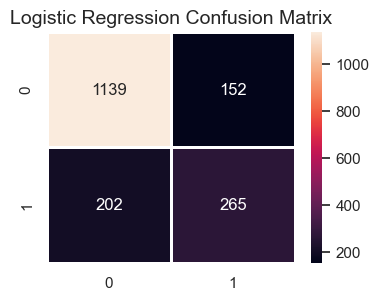

In [82]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, LR_pred),
            annot=True,
            fmt='d',
            linecolor='white',
            linewidths=1)
plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.show()

In [83]:
y_pred_prob = LR_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(auc_score)

0.8383803535263901


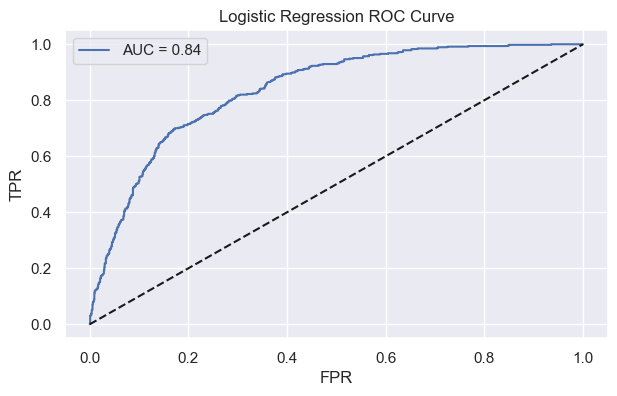

In [84]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

#### 2. Decision Tree Classifier
- AUC_score : `0.83`

In [85]:
DT_model = DecisionTreeClassifier(criterion='gini',max_depth=5)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [86]:
DT_accuracy = DT_model.score(X_test, y_test)
DT_accuracy

0.7889647326507395

In [87]:
DT_pred = DT_model.predict(X_test)
report  = classification_report(y_test, DT_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1291
           1       0.62      0.53      0.57       467

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



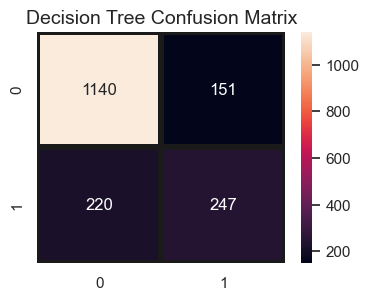

In [88]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, DT_pred),
            annot=True,
            fmt='d',
            linecolor='k',
            linewidths=3)
plt.title('Decision Tree Confusion Matrix', fontsize=14)
plt.show()

In [89]:
y_pred_prob = DT_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(auc_score)

0.8319671519347418


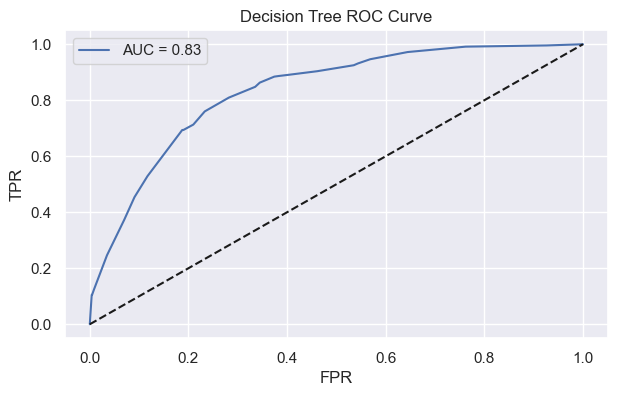

In [90]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

#### 3. Random Forest Classifier
- AUC_score : `0.80`

In [91]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [92]:
RF_accuracy = RF_model.score(X_test, y_test)
RF_accuracy

0.7781569965870307

In [93]:
RF_pred = RF_model.predict(X_test)
report  = classification_report(y_test, RF_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1291
           1       0.60      0.48      0.53       467

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



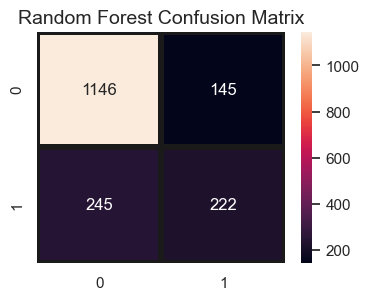

In [94]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, RF_pred),
            annot=True,
            fmt='d',
            linecolor='k',
            linewidths=3)
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.show()

In [95]:
y_pred_prob = RF_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(auc_score)

0.8032698786028127


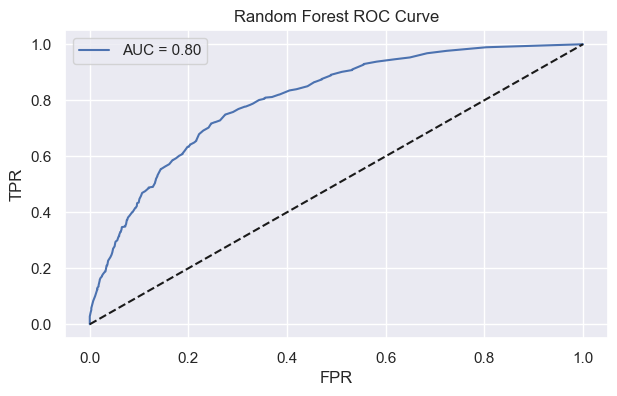

In [96]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

#### 4. Support Vector Classifier(SVC)
- AUC_score : `0.83`

In [97]:
SVC_model = SVC(kernel='linear',probability=True)
SVC_model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [98]:
SVC_accuracy = SVC_model.score(X_test, y_test)
SVC_accuracy

0.7940841865756542

In [99]:
SVC_pred = SVC_model.predict(X_test)
report  = classification_report(y_test, SVC_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1291
           1       0.63      0.56      0.59       467

    accuracy                           0.79      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



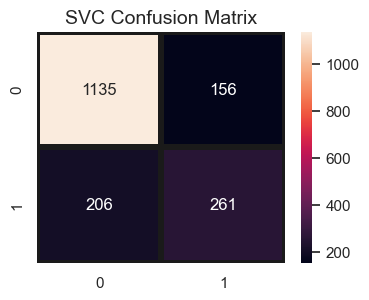

In [100]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, SVC_pred),
            annot=True,
            fmt='d',
            linecolor='k',
            linewidths=3)
plt.title('SVC Confusion Matrix', fontsize=14)
plt.show()

In [101]:
y_pred_prob = SVC_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(auc_score)

0.828461578014155


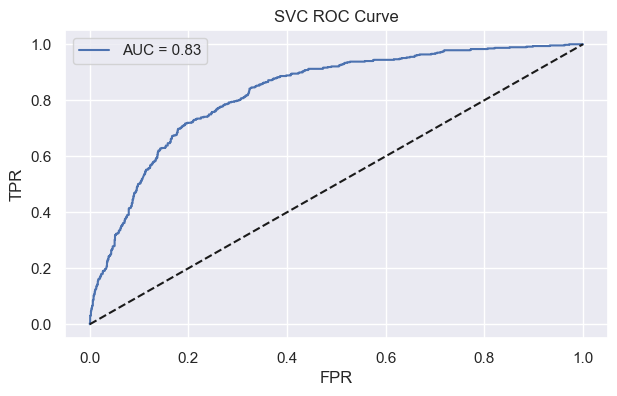

In [102]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVC ROC Curve')
plt.legend()
plt.show()

#### 5. Gradient Boosting Classifier
- AUC_score : `0.84`

In [103]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [104]:
GB_accuracy = GB_model.score(X_test,y_test)
GB_accuracy

0.8020477815699659

In [105]:
GB_pred = GB_model.predict(X_test)
report  = classification_report(y_test, GB_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.66      0.54      0.59       467

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758



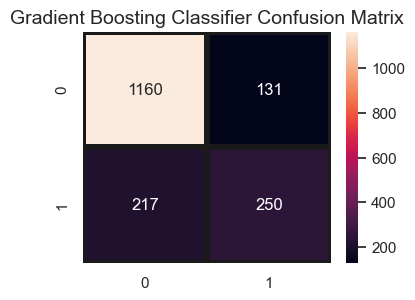

In [106]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, GB_pred),
            annot=True,
            fmt='d',
            linecolor='k',
            linewidths=3)
plt.title('Gradient Boosting Classifier Confusion Matrix', fontsize=14)
plt.show()

In [107]:
y_pred_prob = GB_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(auc_score)

0.8374448703509886


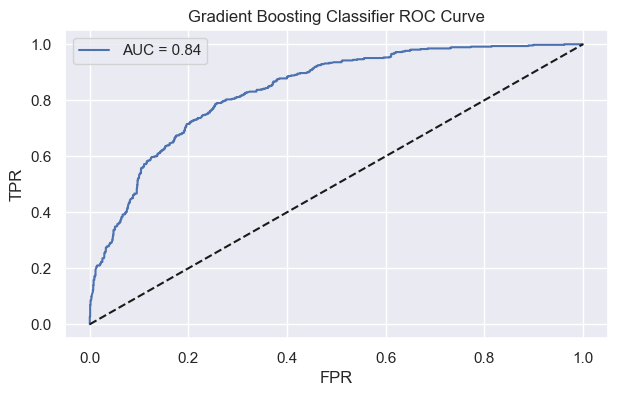

In [108]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.legend()
plt.show()

#### 6. XGBoost
- AUC_score : `0.81`

In [109]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [110]:
XGB_accuracy = XGB_model.score(X_test,y_test)
XGB_accuracy

0.7741751990898749

In [111]:
XGB_pred = XGB_model.predict(X_test)
report  = classification_report(y_test, XGB_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1291
           1       0.58      0.52      0.55       467

    accuracy                           0.77      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.77      0.77      0.77      1758



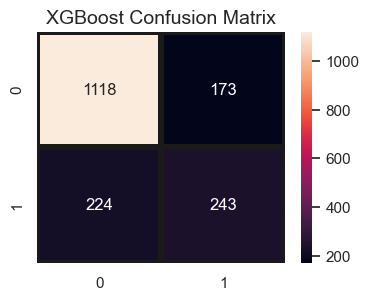

In [112]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, XGB_pred),
            annot=True,
            fmt='d',
            linecolor='k',
            linewidths=3)
plt.title('XGBoost Confusion Matrix', fontsize=14)
plt.show()

In [113]:
y_pred_prob = XGB_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(auc_score)

0.8123908395629768


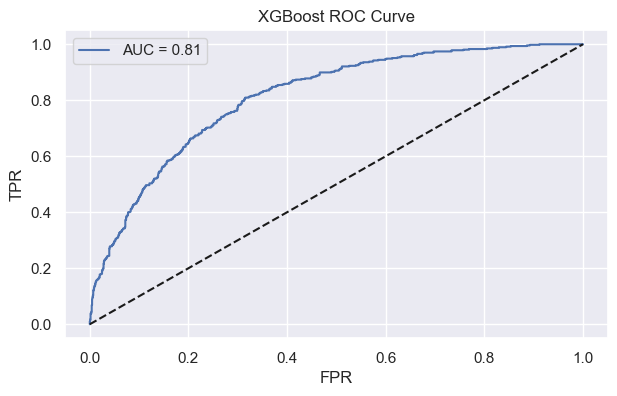

In [114]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

#### 7. Feed-Forward Neural Network(FNN)
- AUC_score : `0.83`

In [115]:
FNN_model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(17,),activation='relu'),
    keras.layers.Dense(20,input_shape=(17,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [116]:
FNN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [117]:
FNN_model.fit(X_train,y_train,epochs=20)

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6206 - loss: 0.6226
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7911 - loss: 0.4363
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7958 - loss: 0.4339
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4172
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8002 - loss: 0.4175
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8039 - loss: 0.4135
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4154
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8073 - loss: 0.4056
Epoch 9/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4146
Epoch 10/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.3953
Epoch 11/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8086 - loss: 0.4071
Epoch 12/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [118]:
FNN_model.evaluate(X_test, y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4313


[0.4262152910232544, 0.7974971532821655]

In [119]:
y_pred = FNN_model.predict(X_test)
y_pred

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.67427677],
       [0.00689608],
       [0.41146597],
       ...,
       [0.09673097],
       [0.10684892],
       [0.34722972]], dtype=float32)

In [120]:
FNN_pred = []

for i in y_pred:
    if i > 0.5:
        FNN_pred.append(1)
    else:
        FNN_pred.append(0)

FNN_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [121]:
report  = classification_report(y_test, FNN_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.65      0.53      0.58       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



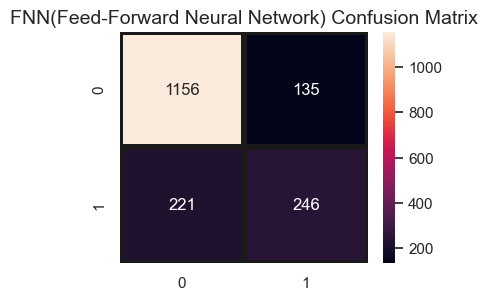

In [122]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, FNN_pred),
            annot=True,
            fmt='d',
            linecolor='k',
            linewidths=3)
plt.title('FNN(Feed-Forward Neural Network) Confusion Matrix', fontsize=14)
plt.show()

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.8379291985198135


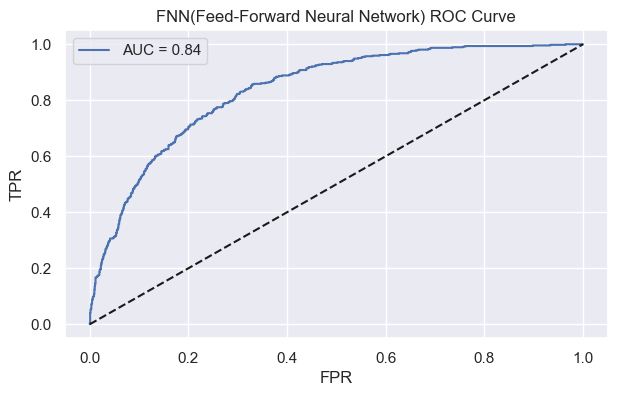

In [124]:
plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('FNN(Feed-Forward Neural Network) ROC Curve')
plt.legend()
plt.show()

### Interpretability analysis using SHAP

#### Code

In [125]:
explainer = shap.Explainer(LR_model.predict, shap.sample(X_train,1000))

In [126]:
sample_test = shap.sample(X_test, 1000)

In [127]:
shap_values = explainer.shap_values(sample_test)

PermutationExplainer explainer: 1001it [00:19, 52.29it/s]                                                              


#### Plot

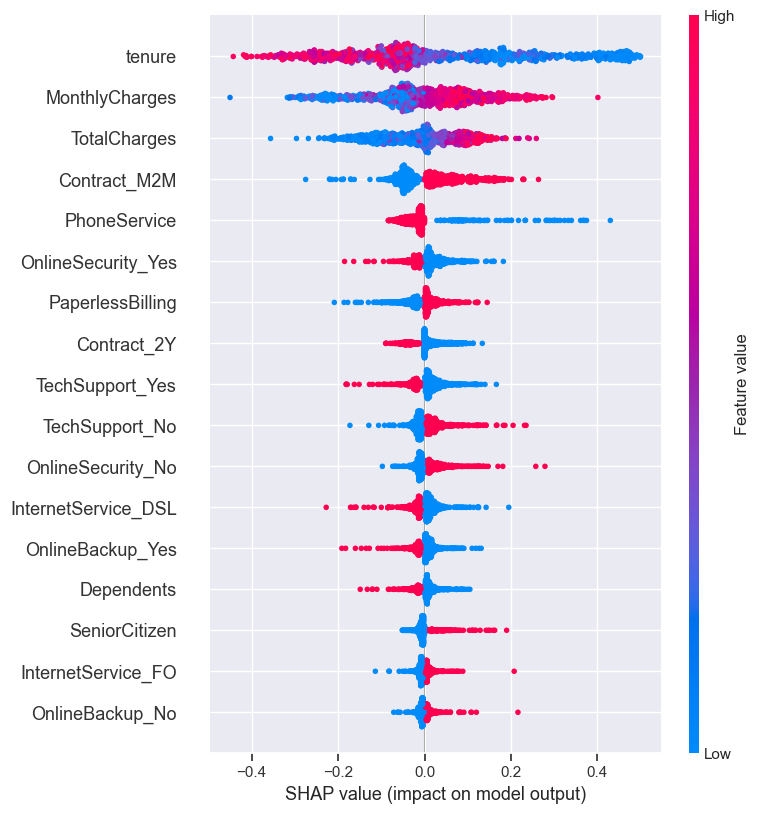

In [128]:
shap.summary_plot(shap_values,sample_test)